## Decision tree visualization using `dtreeviz`

This notebook contains various implemenations of decision tree visualization using `dtreeviz`. We have tested and tuned to make visualizations look nice for different data sets (both classification and regression datasets) and for various tree depths. The plots have been carefully tweaked to make them look good within jupyter notebooks as well as when saves as image (svg/pdf) files.  

Make sure to have latest `graphviz` installed

In [1]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg

### Regression tree on boston data

The default regression tree is the **fancy** version with **top-down** alignment that shows decision nodes using scatter plot. 
Below is the decision tree with **depth=3** on [boston house-prices dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) (regression).

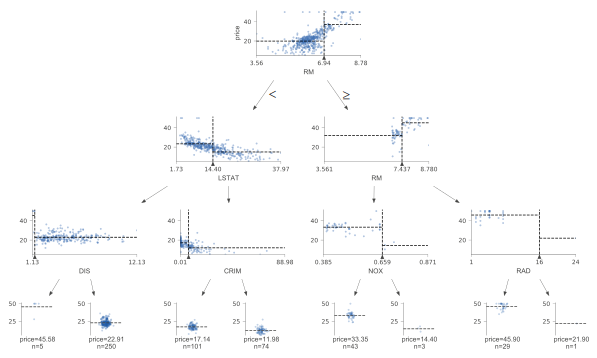

In [2]:
regr = tree.DecisionTreeRegressor(max_depth=3)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='price',  # this name will be displayed at the leaf node
               feature_names=boston.feature_names 
              )
viz
# viz.view() will give give a popup with graph in pdf

### Classification tree on iris data

Let's see visualziations on the classic [iris multi-class dataset](https://archive.ics.uci.edu/ml/datasets/iris). It's required to pass the `class_names` argument for classification trees. This is required to match the legend lables with right category codes of class. The order of labels should be in sequence of class categories.

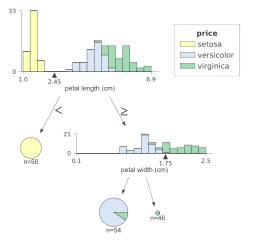

In [3]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default
viz

### Classification tree with left to right alignment on breast cancer wisconsin dataset 

[Breast Cancer Wisconsin Dataset](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

We can just use `orientation` parameter to display the trees from left to right rather than top down

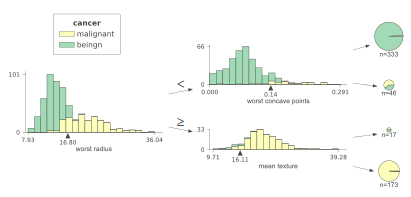

In [4]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
cancer = load_breast_cancer()

X_train = cancer.data
y_train = cancer.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='cancer',
               feature_names=cancer.feature_names, 
               class_names=["malignant", "beingn"],
               orientation='LR')
viz

### Classification tree on 10 classes (digits dataset)

When there are more than four or five classes, the stacked histograms are difficult to read and so we recommend setting the `histtype` parameter to bar not barstacked in this case. With high cardinality target categories, the overlapping distributions are harder to visualize and things break down, so we set a limit of 10 target classes. 

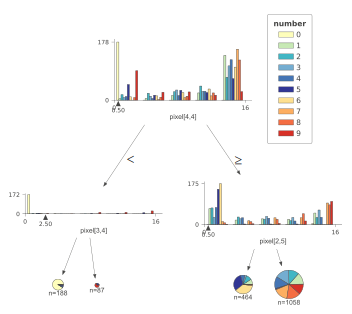

In [5]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
digits = load_digits()

X_train = digits.data
y_train = digits.target
clas.fit(X_train, y_train)

# "8x8 image of integer pixels in the range 0..16."
columns = [f'pixel[{i},{j}]' for i in range(8) for j in range(8)]


viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='number',
               feature_names=columns, 
               class_names=[chr(c) for c in range(ord('0'),ord('9')+1)],
               histtype='bar', 
               orientation ='TD')
viz

### Prediction path of a single observation on wine classificaton data

[Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

Sometimes, it is important to understand which decision path is followed by a specific test observation. The prediction path is usually used for interpretetion of a prediction to understand why the tree made xyz prediction for the observation abc. 

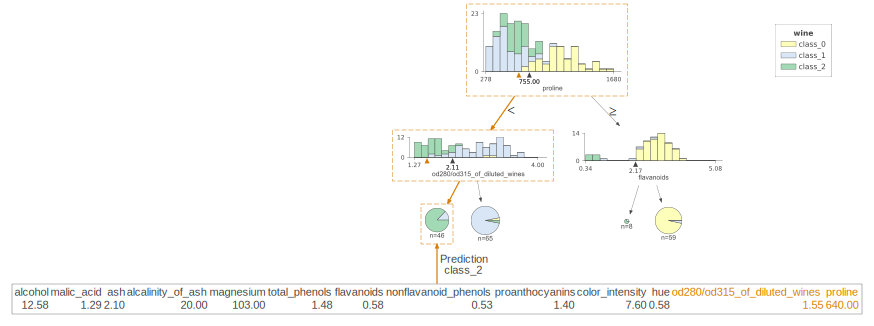

In [6]:
clf = tree.DecisionTreeClassifier(max_depth=2)  
wine = load_wine()

X_train = wine.data
y_train = wine.target
clf.fit(X_train, y_train)

# pick random X observation for demo
X = wine.data[np.random.randint(0, len(wine.data)),:]

viz = dtreeviz(clf,
               wine.data,
               wine.target,
               target_name='wine',
               feature_names=wine.feature_names,
               class_names=list(wine.target_names),
               X=X)  # pass the test observation
viz

### Show node numbers (diabetes data)

[Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/diabetes)

We can turn on node id labelling that is useful if we are trying to understand or expain the working of a decision tree using dtreeviz visualizations.

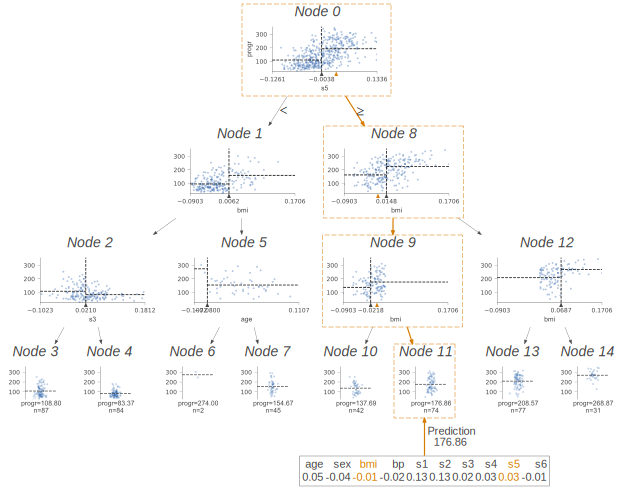

In [7]:
regr = tree.DecisionTreeRegressor(max_depth=3)
diabetes = load_diabetes()

X_train = diabetes.data
y_train = diabetes.target
regr.fit(X_train, y_train)

X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='progr',  # this name will be displayed at the leaf node
               feature_names=diabetes.feature_names,
               X=X, 
               show_node_labels = True
              )
viz

### Simple graph without histogram or scatterpots for decision nodes (knowledge dataset)

[Knowledge Dataset](https://github.com/parrt/dtreeviz/blob/master/testing/data/knowledge.csv)

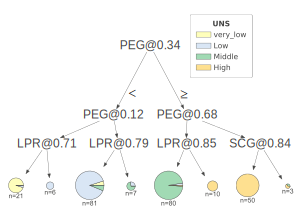

In [8]:
# data from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
clf = tree.DecisionTreeClassifier(max_depth=3)
know = pd.read_csv("../testing/data/knowledge.csv")
target_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(target_names)})

X_train, y_train = know.drop('UNS', axis=1), know['UNS']
clf = clf.fit(X_train, y_train)

viz = dtreeviz(clf, 
               X_train,
               y_train,
               target_name='UNS',
               feature_names=X_train.columns.values,
               class_names=target_names,
               fancy=False)
viz

### End